<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/opencv_basics/104/gamma_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/gamma-correction/gamma-correction.zip
!unzip -qq gamma-correction.zip
%cd gamma-correction
%ls -hal

--2022-06-04 15:00:14--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/gamma-correction/gamma-correction.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.180.97
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.180.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 639786 (625K) [binary/octet-stream]
Saving to: ‘gamma-correction.zip’

gamma-correction.zi 100%[===================>] 624.79K  2.03MB/s    in 0.3s    

2022-06-04 15:00:14 (2.03 MB/s) - ‘gamma-correction.zip’ saved [639786/639786]

/content/gamma-correction
total 644K
drwxr-xr-x 2 root root 4.0K Sep 30  2015 ./
drwxr-xr-x 1 root root 4.0K Jun  4 15:00 ../
-rw-r--r-- 1 root root 1.3K Sep 30  2015 adjust_gamma.py
-rw-r--r-- 1 root root 366K Sep 29  2015 example_01.png
-rw-r--r-- 1 root root 262K Sep 29  2015 exam

In [2]:
# import the necessary packages
import argparse
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [4]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping pixel values
    # [0, 255] to adjusted gamma values
    inv_gamma = 1.0 / gamma
    table = np.array(
        [
         ((i / 255.0) ** inv_gamma) * 255 
         for i in np.arange(0, 256)
        ]
        ).astype("uint8")

    # apply gamma correction to image using LUT
    return cv2.LUT(image, table)

In [5]:
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "example_02.png"
}

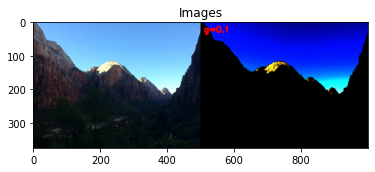

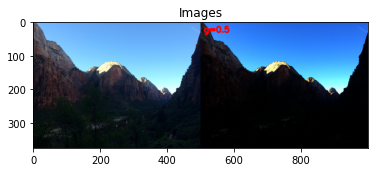

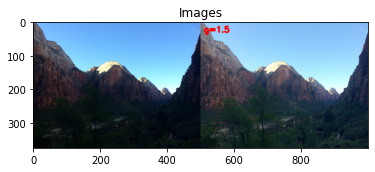

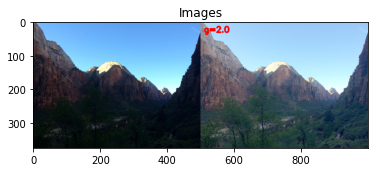

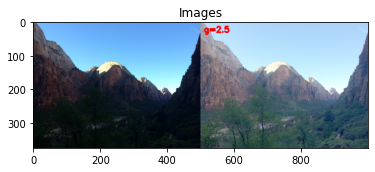

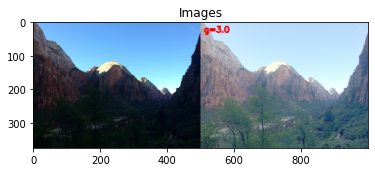

In [6]:
# load the original image
original = cv2.imread(args["image"])

# loop over various gamma values
for gamma in np.arange(0.0, 3.5, 0.5):
    # ignore 1.0 (no change)
    if gamma == 1:
        continue
    
    # apply gamma correction and show image
    gamma = gamma if gamma > 0 else 0.1
    adjusted = adjust_gamma(original, gamma=gamma)
    cv2.putText(
        adjusted, 
        f"g={gamma}", 
        (10, 30), 
        cv2.FONT_HERSHEY_SIMPLEX, 
        0.8, 
        (0, 0, 255), 
        3
        )
    plt_imshow("Images", np.hstack([original, adjusted]))

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*OpenCV Gamma Correction*](https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/) published on 2015-10-05.